<h1><center>  lab 4 : ML Overview: Unsupervised Learning algorithms </center>
    
<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
```Date: May 24th 2022```

```Image source: https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [2]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np # matrix calculation
import pandas as pd #import data nicely 
import matplotlib.pyplot as plt # plot things nicely 
from collections import Counter # not a default function but very useful - counter

lst = [1,1,1,2,2, 3,4]
Counter(lst)

Counter({1: 3, 2: 2, 3: 1, 4: 1})


## Dataset
> Collaborative problem solving (CPS) Data (Polyak et al., 2017).\
> *“a sample of middle school children who interacted with a game-like, online simulation of collaborative problem-solving tasks.”*

---
#### Collaborative Problem Solving Variables

| Variable            | 
|-----------------------------|
| Feture Identification (FI)                 | 
| Maintaining a Shared Understanding (MU)                     | 
| Engagement/Interaction (EN)           | 
| Strategy (S) | 
| Evaluate (EV)             | 




In [7]:
data = pd.read_csv('./week3_data/cps.csv', header=None)

data.columns = ['FI', 'MU', 'EN', 'S', 'EV']
data.describe()


,FI,MU,EN,S,EV
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,25.320755,17.276730,32.635220,3.207547,3.000000
std,18.491298,10.524782,21.486358,2.128991,3.603795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,14.500000,2.000000,0.000000
50%,28.000000,17.000000,31.000000,3.000000,2.000000
75%,42.000000,24.000000,50.000000,5.000000,4.500000
max,60.000000,43.000000,79.000000,9.000000,15.000000


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: K-means from scratch
 > **STEP 1**: Create your data (X) - Hint: `create_samples`, k= 3, n_points = 100\
 > **STEP 2**: Generate Initial Centroids - Hint: `np.random.rand( , )` to generate the initial values\
 > **STEP 3**: Iterate until the centroids do not change OR let's do **10** iterations - Hint: For/while loop\
 > **STEP 4**: Make sure you plot the changes using `plot_clusters`

In [9]:
import matplotlib.pyplot as plt # to plot clusters 
import numpy as np # for basic algebra operations 


def create_samples(n_center= 3, n_points = 100):
    #img_counter= 0 
    for i in range(n_center):
        m = [15*np.random.random(),10*np.random.random()]
        a=np.random.multivariate_normal(m,[[1,0],[0,1]], n_points)    
        
        if i==0:
            X=a
        else:    
            X=np.vstack((X,a))
        
    plt.figure(figsize=(10,8))
    plt.scatter(X[:,0],X[:,1])
    return X 
    
def compute_clusters(X,centroids,k): # Assign 
    clusters=dict()                      #receives X(data), centroids, and k(cluster number)
    for i in range(k):
        clusters[i]=[]
    for data in X:
        e_distance=[]
        for j in range(k):
            e_distance.append(np.linalg.norm(data - centroids[j]))
        clusters[e_distance.index(min(e_distance))].append(data)
    return clusters    
 
def compute_centroids(centroids,clusters,k): # Update: computes the new centroids 
    for i in range(k):
        centroids[i]=np.average(clusters[i],axis=0)
    return centroids


def plot_clusters(centroids,clusters,k): # plot your clusters 
    colors = ["red", "blue" , "green", "orange"]
    plt.figure(figsize=(10,8))  
    area = (20)**2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0],cluster[1],c=colors[i % 3])          
        plt.scatter(centroids[i][0],centroids[i][1],s=area,marker='^', edgecolors='white',c=colors[i % 3])


iteration ----  0
iteration ----  1
iteration ----  2
iteration ----  3
iteration ----  4
iteration ----  5
iteration ----  6
iteration ----  7
iteration ----  8
iteration ----  9
iteration ----  10
iteration ----  11
iteration ----  12
iteration ----  13
iteration ----  14
iteration ----  15
iteration ----  16
iteration ----  17
iteration ----  18
iteration ----  19


/var/folders/fb/h76bxzm91r32gmwmtqr_zgvm0000gn/T/ipykernel_98178/3217719553.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


iteration ----  20
iteration ----  21
iteration ----  22
iteration ----  23
iteration ----  24
iteration ----  25
iteration ----  26
iteration ----  27
iteration ----  28
iteration ----  29


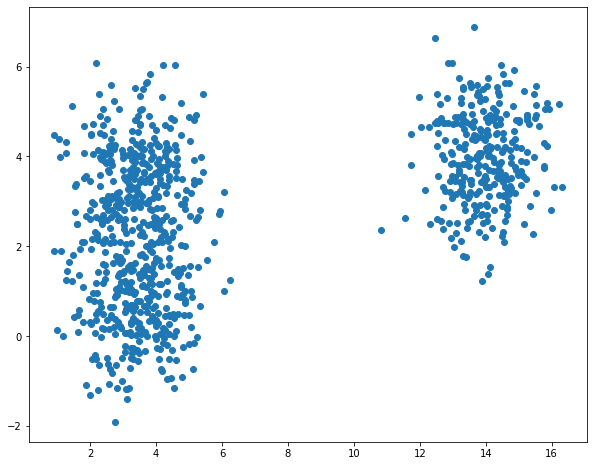

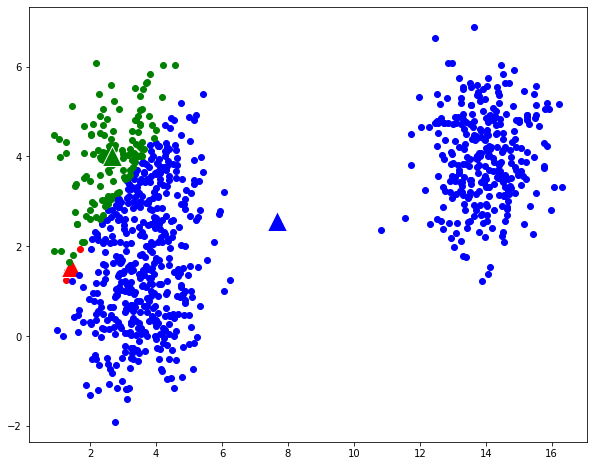

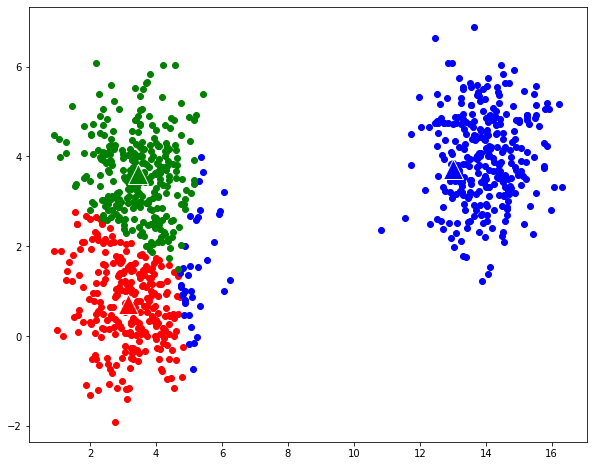

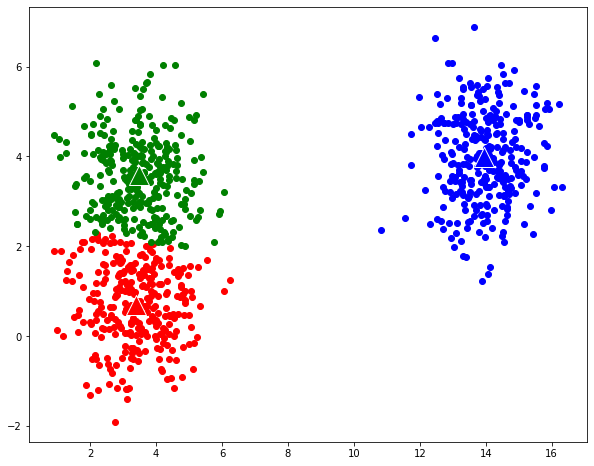

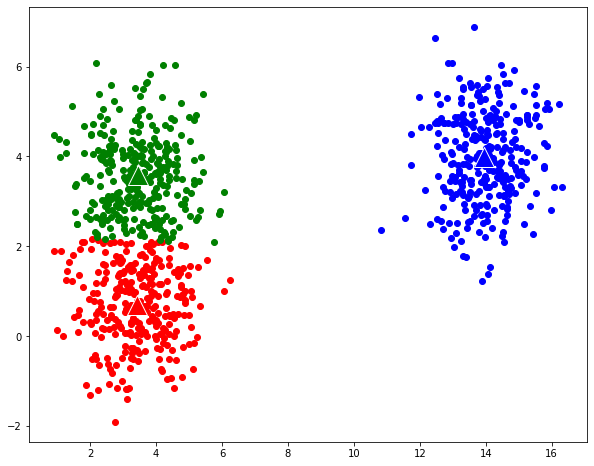

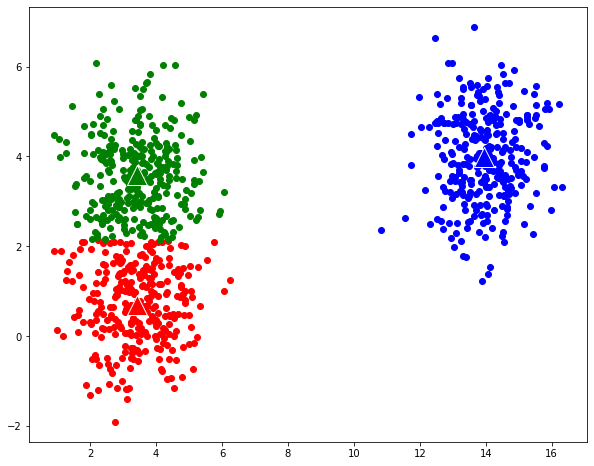

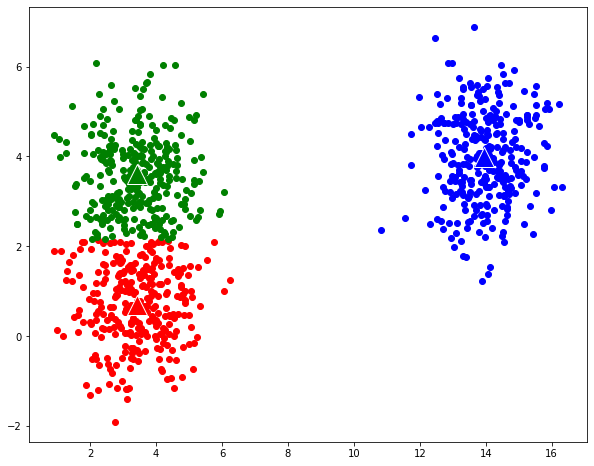

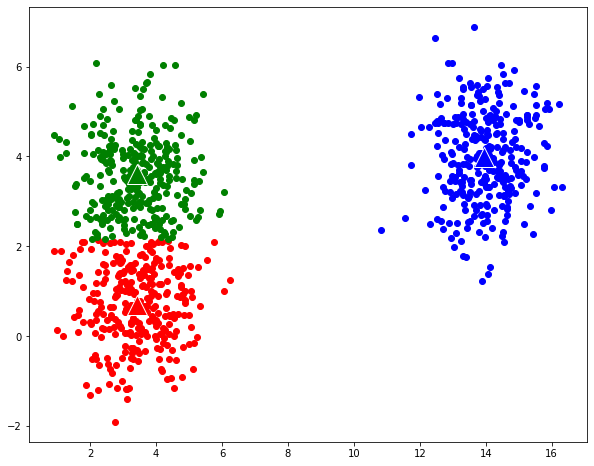

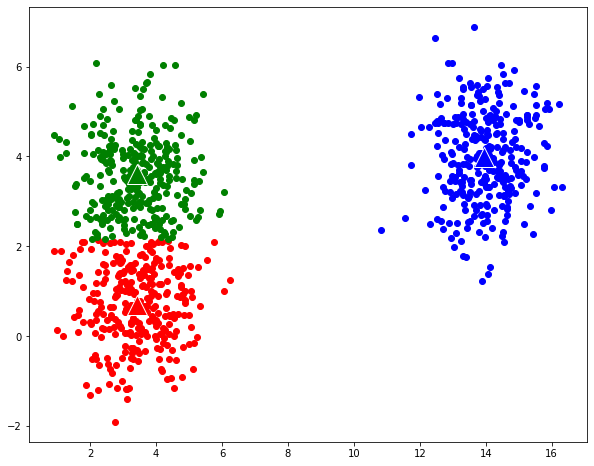

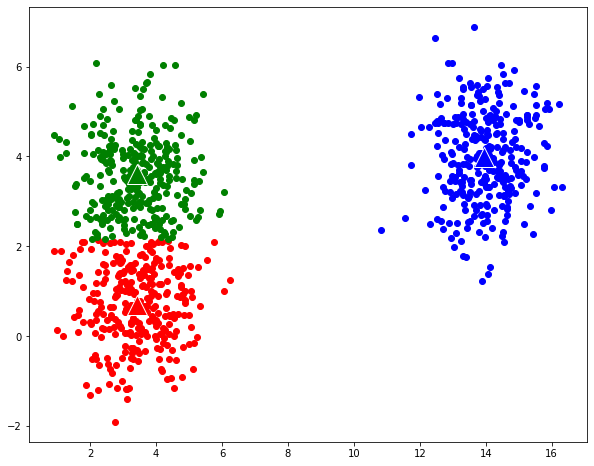

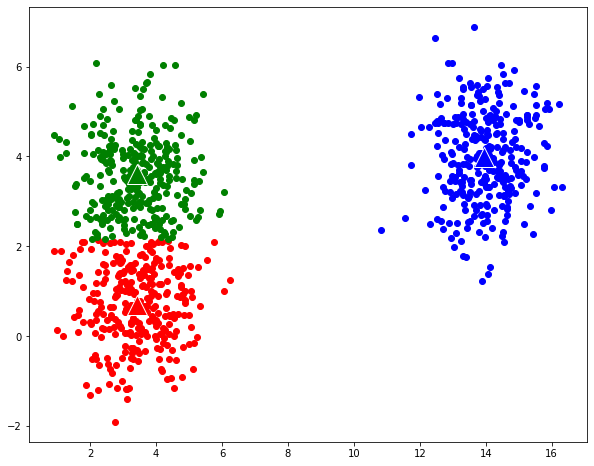

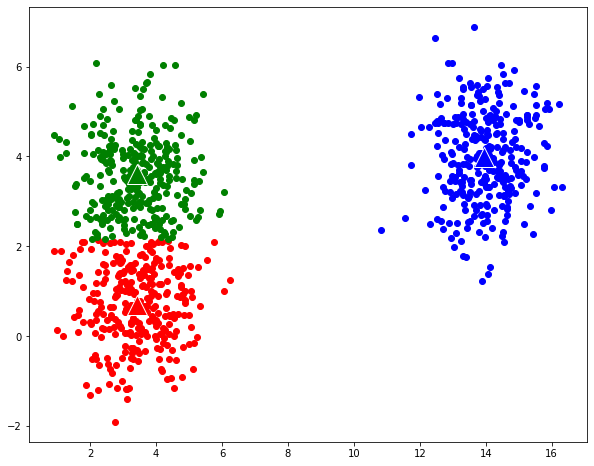

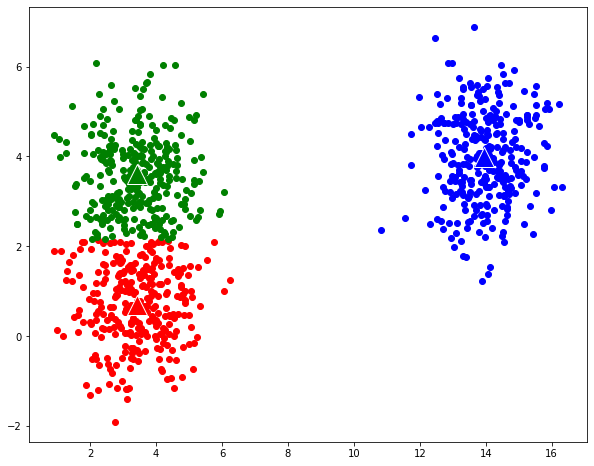

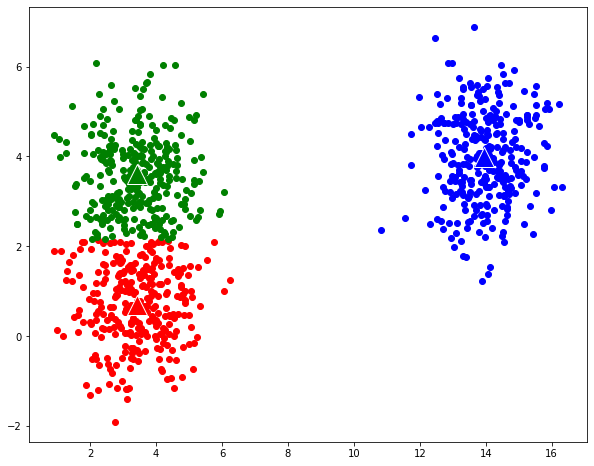

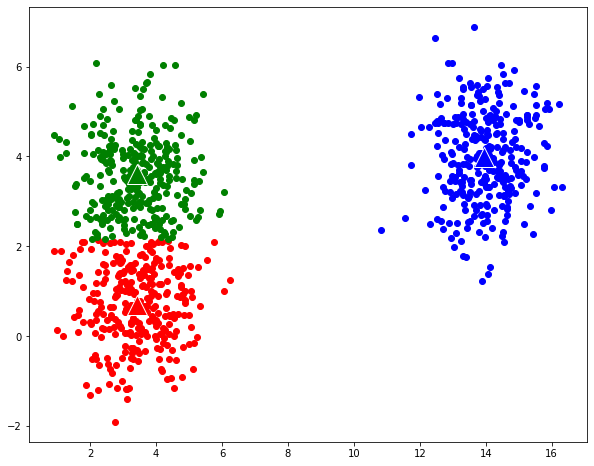

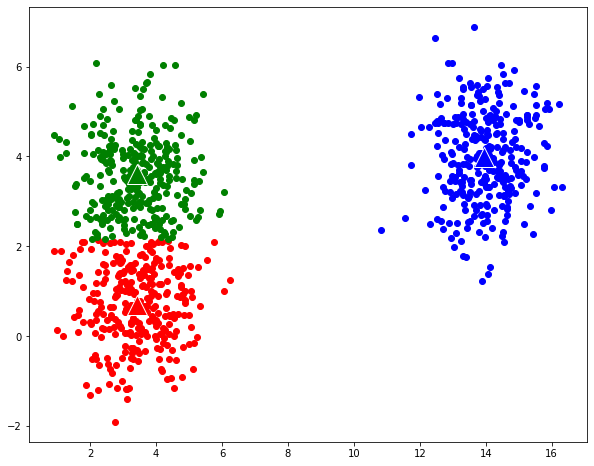

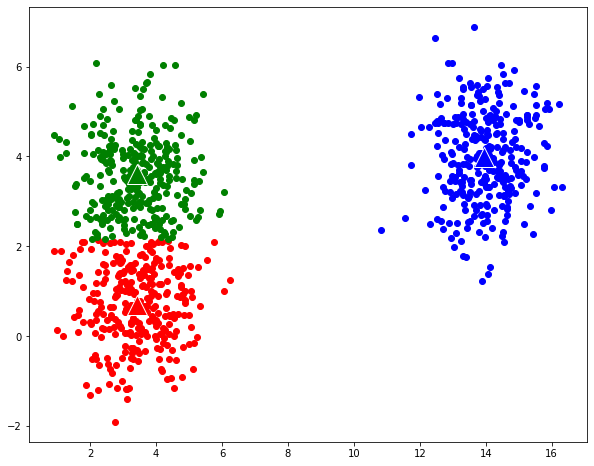

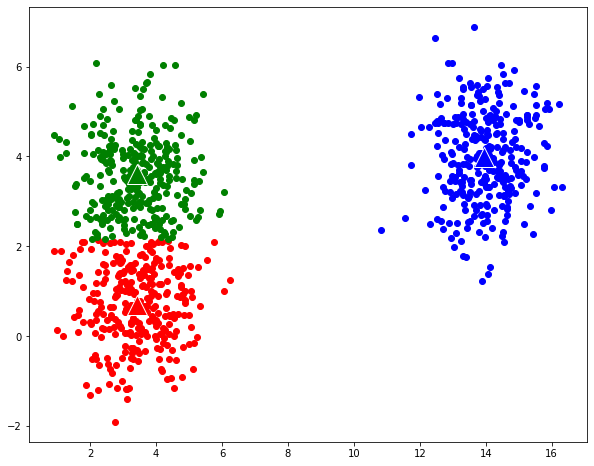

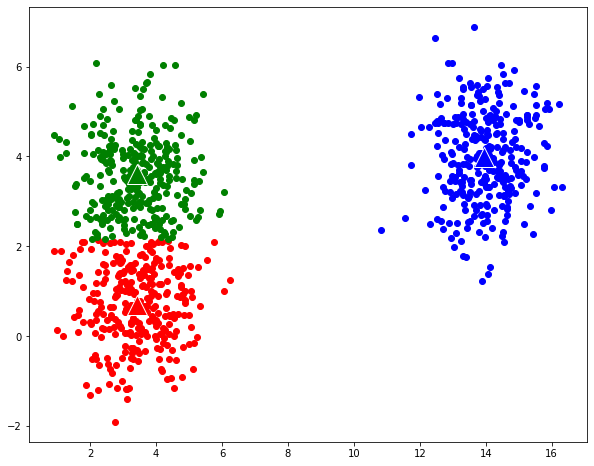

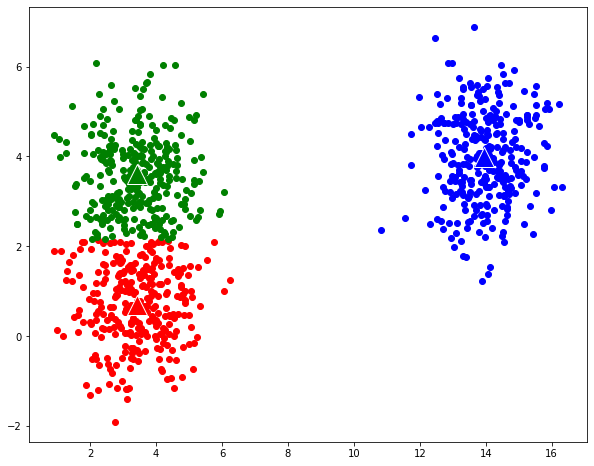

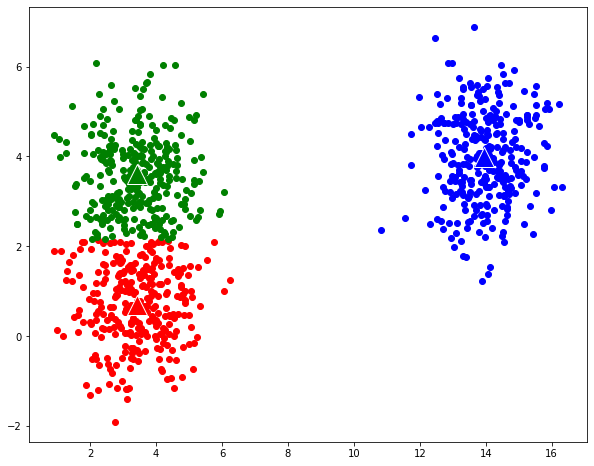

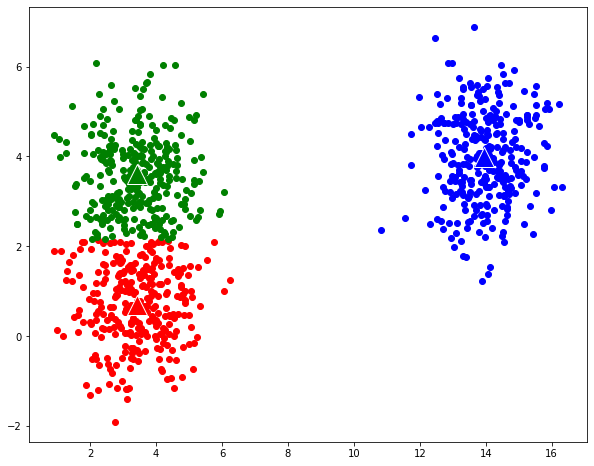

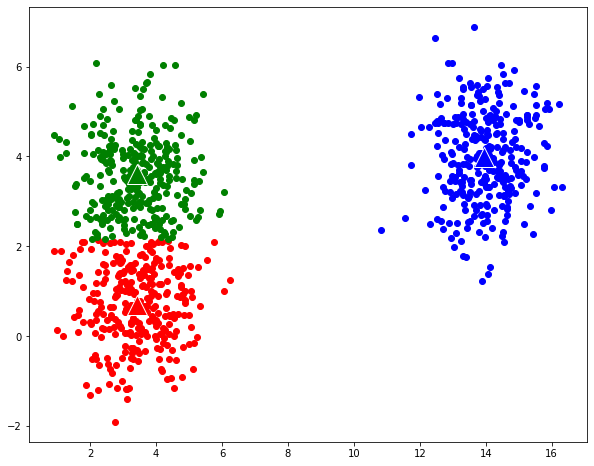

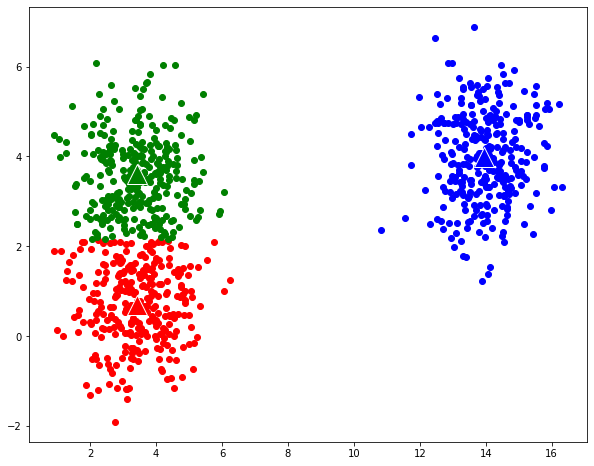

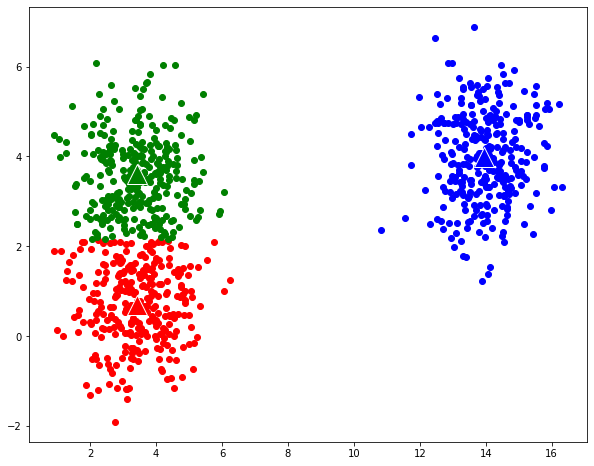

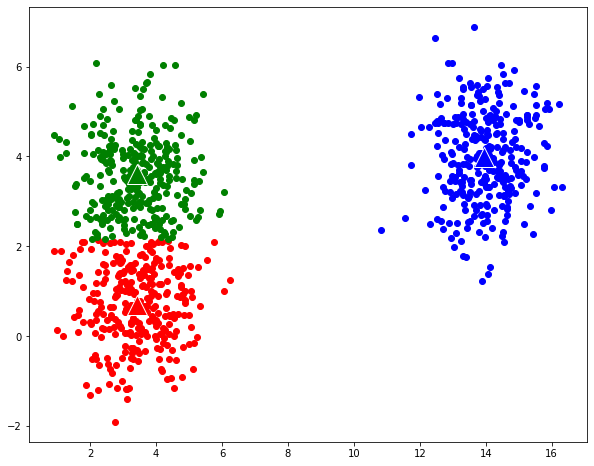

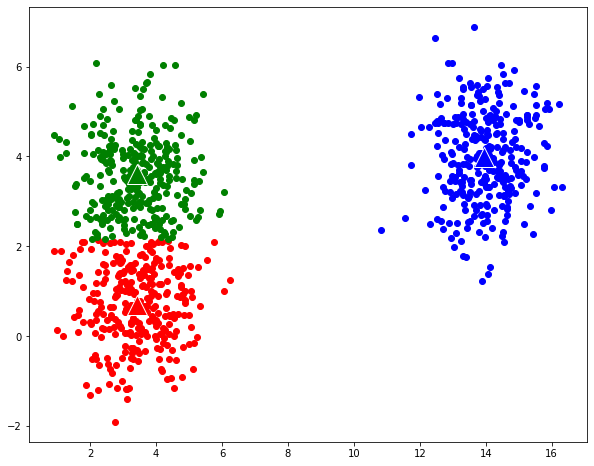

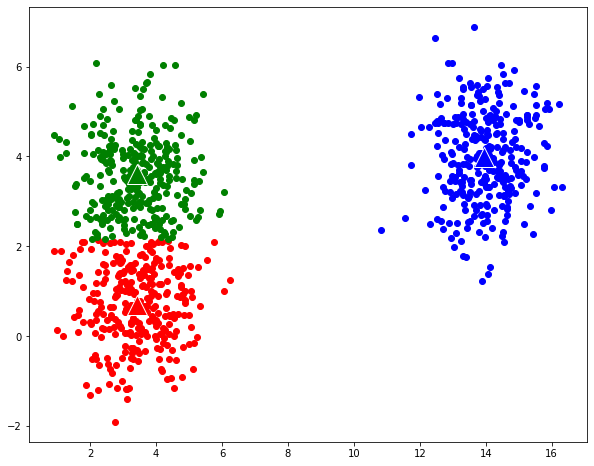

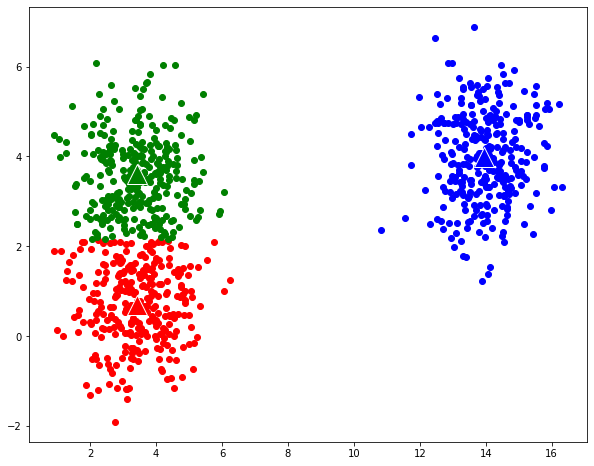

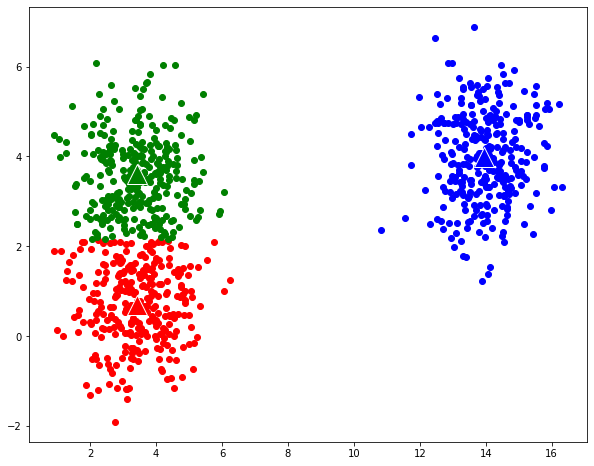

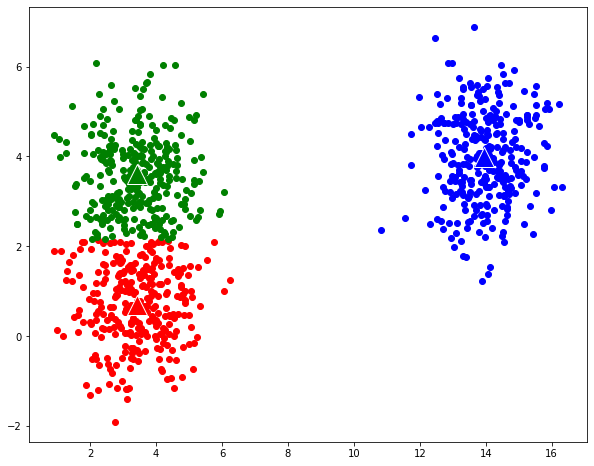

In [18]:
############################# YOUR CODE HERE ##################################

# STEP 1: Create your data (X) - Hint: create_samples, k= 3, n_points = 100



# STEP 2: Generate Initial Centroids -

# STEP 3: Iterate until the centroids do not change - Hint: compute_clusters, compute_ceontroids 
          # Make sure you plot the changes using 'plot_clusters'
X = create_samples(3, 300)
centroids = np.random.rand(3,2) #initial centroid that I defined outside of my loop
k=3

for i in range(0, 30):

    print('iteration ---- ', i)
    clusters = compute_clusters(X,centroids,k)
    centroids = compute_centroids(centroids,clusters,k)
    plot_clusters(centroids,clusters,k)
    #print('iteration ---- finished')

    
    
###############################################################################    

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 2: CPS dataset 
 > Let's conduct clustering analysis with our CPS dataset.
 
 > Remember we learned several variations of clustering algorithms -- K-means, Hiearchical clustering..\
 > We can do the analysis simply using `sklearn.cluster`. In order to call the algorithms\
 > `from sklearn.cluster import KMeans` and `from sklearn.cluster import AgglomerativeClustering`

### Kmeans Clustering 

Counter({0: 67, 1: 54, 2: 38})


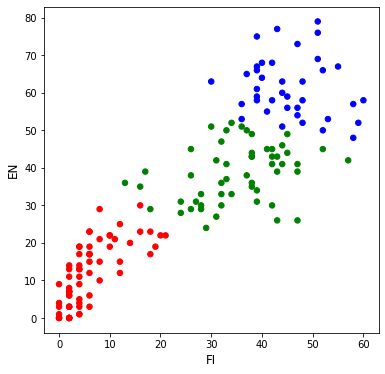

array([1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0], dtype=int32)

In [22]:
import matplotlib.pyplot as plt # this is to plot our results 
from sklearn.cluster import KMeans # kmeans algorithm 

%matplotlib inline
plt.figure(figsize=(6, 6)) # setting the plot resolutions 

################ What was our CPS data called?

data.columns = ['FI','MU','EN', 'EV', 'S']
kmeans= KMeans(n_clusters=3).fit(data)              # step 2: define or development model  + step3: learning
kmeans_labels = kmeans.labels_
print(Counter(kmeans_labels))

color_theme = np.array(['red','green','blue'])

plt.scatter(x=data.FI, y=data.EN, 
            c=color_theme[kmeans.labels_], s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()

################ How do we extract a feature matrix from a pandas dataframe? 
'''
data.columns = ['FI','MU','EM', 'EV', 'S']
kmeans = KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
print(Counter(kmeans.labels_))

color_theme = np.array(['red','green','blue'])

plt.scatter(x=data.FI, y=data.EM, 
            c=color_theme[kmeans.labels_], s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()
'''

kmeans_labels

### Hierarchical Clustering

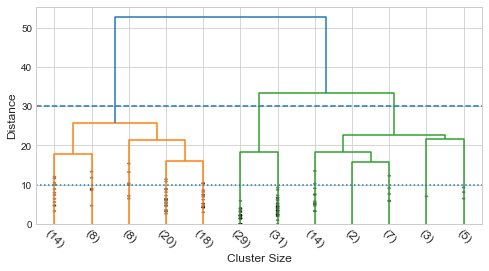

In [23]:
import matplotlib.pyplot as plt # this is to plot our results 
from scipy.cluster.hierarchy import dendrogram, linkage # this is to define a linkage method
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 4))

################ Let's define a linkage method 


Z = linkage(data, 'average') 

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=30, linestyle='dashed')
plt.axhline(y=10, linestyle='dotted')
plt.show()




In [25]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') #FIT AND LEARN MODEL 
ac_labels = cluster.fit_predict(data)
ac_labels

array([1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2])

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
> "Finds core samples of high density and expands clusters from them.\
> Good for data which contains clusters of similar density" (scikit-learn, n.d.).
> - Link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Counter({-1: 67, 0: 61, 1: 31})


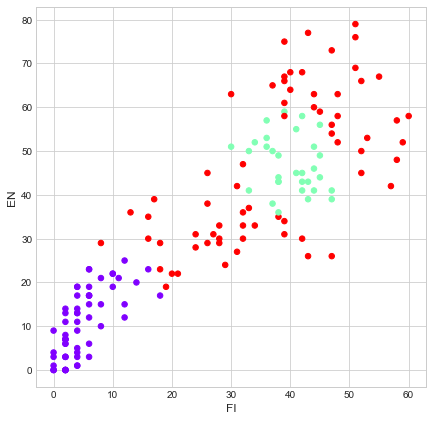

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN


%matplotlib inline
plt.figure(figsize=(7, 7))

model = DBSCAN(eps=8.0, min_samples=8).fit(data)
dbscan_labels = model.labels_
print(Counter(model.labels_))

color_theme = cm.rainbow(np.linspace(0,1,len(Counter(model.labels_))))
plt.scatter(x=data.FI,y=data.EN,c=color_theme[model.labels_],s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()


### Let's compare the model results 
> explore! `kmeans_labels`, `ac_labels`, and `dbscan_labels`\
> Let's try to put them into a dataframe.


In [32]:
result = pd.DataFrame(list(zip(kmeans_labels, ac_labels)))
result.columns = ['KC', 'HC']
result['DC'] = dbscan_labels

In [34]:
pd.crosstab(result['KC'], result.HC)

HC,0,1,2
KC,,,
0,0,7,60
1,30,24,0
2,38,0,0


In [35]:
Counter(ac_labels)

Counter({1: 31, 0: 68, 2: 60})

In [36]:
Counter(kmeans_labels)

Counter({1: 54, 2: 38, 0: 67})